# Objetivo: Treinar um modelo que representa uma relação linear entre a feature e o vetor (numérico) target.
***

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
features = boston.data[: ,0:2]
target = boston.target 
target *= 1000

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = features
y = target

In [5]:
regression = LinearRegression()
model = regression.fit(X, y)

In [6]:
model = regression
print("Os parâmetros do modelo são:")
for parameter in model.get_params():
    print(f"{parameter}")

Os parâmetros do modelo são:
copy_X
fit_intercept
n_jobs
normalize
positive


In [7]:
model.intercept_

22485.628113468218

In [8]:
model.coef_

array([-352.07831564,  116.10909184])

Em nosso dataset, o valor do target é o valor mediano de uma casa em Boston(1970 s) em milhares de dólares. O preço da primeira casa no dataset é:

In [9]:
target[0]

24000.0

In [10]:
model.predict(X)[0]

24573.36663170554

In [12]:
erro_prediction_casa1 = abs(target[0] - model.predict(X)[0])
print(f'O erro de predição da primeira casa é de: {erro_prediction_casa1:.2f} $')

O erro de predição da primeira casa é de: 573.37 $


In [13]:
# Primeiro coeficiente
model.coef_[0]

-352.07831564026753

O que significa que cada crime per capita irá diminuir o preço da casa por aproximadamente $352$ USD

### Criando efeitos interativos

In [14]:
from sklearn.preprocessing import PolynomialFeatures

Criando termo de interação:

In [15]:
interaction = PolynomialFeatures(
    degree=3,
    include_bias=False,
    interaction_only=True
)
features_interaction = interaction.fit_transform(features)

regression = LinearRegression()
model = regression.fit(features_interaction, target)

In [16]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)

# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

In [17]:
import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})

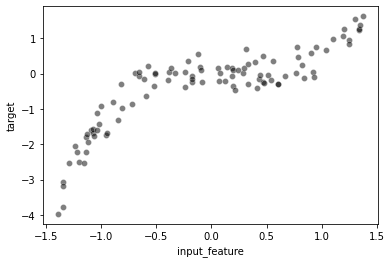

In [18]:
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

In [19]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [20]:
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(data, target)
target_predicted = linear_regression.predict(data)

In [21]:
mse = mean_squared_error(target, target_predicted)

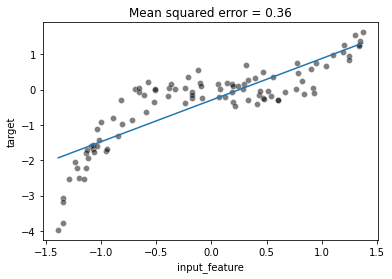

In [22]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

In [23]:
print(f"weight: {linear_regression.coef_[0]:.2f}, "
      f"intercept: {linear_regression.intercept_:.2f}")

weight: 1.18, intercept: -0.29


In [24]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted = tree.predict(data)
mse = mean_squared_error(target, target_predicted)

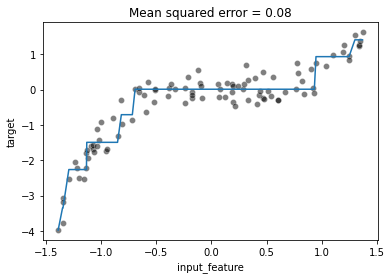

In [25]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Podemos achar novas features a partir das features existentes, como geramos os dados, sabemos que existem um termo quadrático e um cúbico. Este tipo de transformação é chamado de polynomial feature expansion

In [26]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
data_expanded.shape

(100, 3)

In [27]:
linear_regression.fit(data_expanded, target)
target_predicted = linear_regression.predict(data_expanded)
mse = mean_squared_error(target, target_predicted)

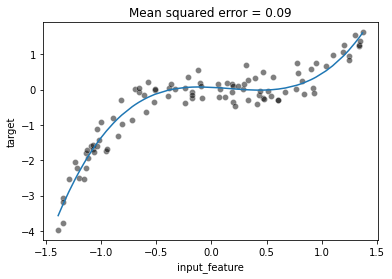

In [28]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Podemos ver que mesmo com um modelo linear, podemos sobrepujar a limitação da linearidade, adicionando componentes não lineares através de novas features

In [31]:
from sklearn.pipeline import make_pipeline


polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
target_predicted = polynomial_regression.predict(data)
mse = mean_squared_error(target, target_predicted)

In [32]:
model = polynomial_regression
print("Os parâmetros do modelo são:")
for parameter in model.get_params():
    print(f"{parameter}")

Os parâmetros do modelo são:
memory
steps
verbose
polynomialfeatures
linearregression
polynomialfeatures__degree
polynomialfeatures__include_bias
polynomialfeatures__interaction_only
polynomialfeatures__order
linearregression__copy_X
linearregression__fit_intercept
linearregression__n_jobs
linearregression__normalize
linearregression__positive


In [33]:
polynomial_regression.steps

[('polynomialfeatures', PolynomialFeatures(degree=3)),
 ('linearregression', LinearRegression())]

In [ ]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, target_predicted)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")